In [38]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

In [39]:
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [40]:
print(tf.__version__)


2.4.1


In [41]:
data_dir = pathlib.Path("/home/divyanshu/Documents/Datasets/catvsdog/training_set")

In [42]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8005


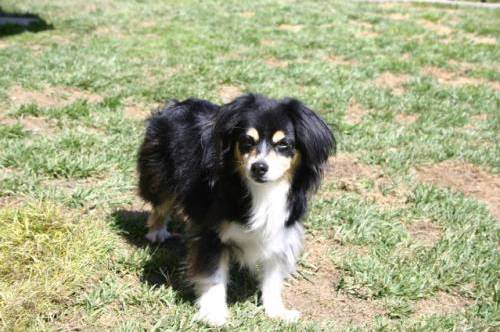

In [43]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))


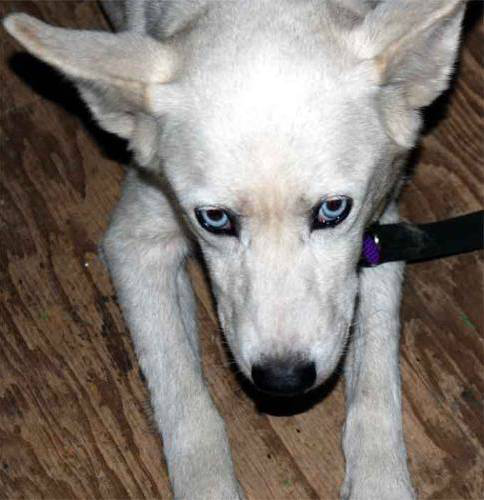

In [44]:
PIL.Image.open(str(dogs[1]))

In [45]:
batch_size = 32
img_height = 50
img_width = 50

In [46]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [48]:
class_names = train_ds.class_names
print(class_names)


['cats', 'dogs']


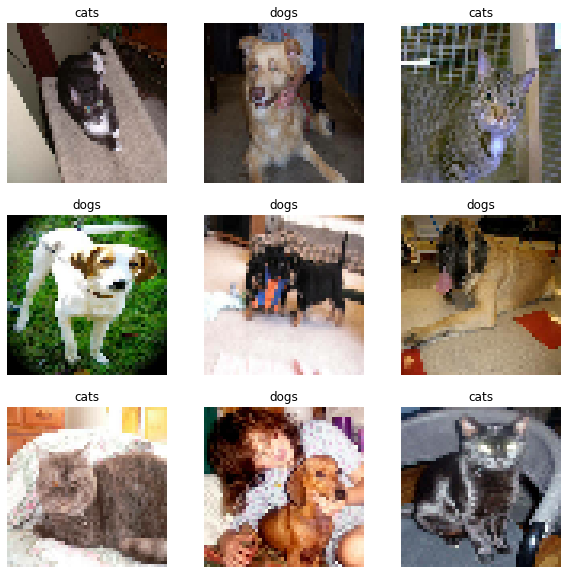

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [50]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 50, 50, 3)
(32,)


In [51]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [52]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
  #layers.Dropout(0.75),
  layers.Flatten(),
  layers.Dense(400, activation='relu'),
  layers.Dense(400, activation='relu'),
  layers.Dense(num_classes)
])


In [54]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 8)         224       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 8)         584       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 16)        1168      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)       

In [56]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25)


Epoch 1/25
201/201 [==============================] - 36s 172ms/step - loss: 0.6940 - accuracy: 0.4878 - val_loss: 0.6933 - val_accuracy: 0.4878
Epoch 2/25
201/201 [==============================] - 23s 117ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6934 - val_accuracy: 0.4878
Epoch 3/25
201/201 [==============================] - 24s 118ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6934 - val_accuracy: 0.4878
Epoch 4/25
201/201 [==============================] - 26s 130ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6933 - val_accuracy: 0.4878
Epoch 5/25
201/201 [==============================] - 24s 121ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6933 - val_accuracy: 0.4878
Epoch 6/25
201/201 [==============================] - 24s 121ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6933 - val_accuracy: 0.4878
Epoch 7/25
 62/201 [========>.....................] - ETA: 15s - loss: 0.6931 - accuracy: 0.5046

KeyboardInterrupt: 